# Preprocessing: jabref
We have focused on extracting the following:
* packages
* libraries
* classes
* methods (public)
* variables (public)
* comments

In [1]:
# Imports and scripts
#import pandas as pd
import modin.pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
import pathmagic
%matplotlib inline
with pathmagic.context():
    import Preprocess as Prep
    import RelativePaths as RP
    import Evaluation as Eva
    import GatherData as Gather
    import Graphs
    import Utils
import ray
ray.init(ignore_reinit_error=True)
Gather.gather_team_mates_data()

2021-03-26 10:53:10,751	INFO services.py:1171 -- View the Ray dashboard at http://127.0.0.1:8265


To request implementation, send an email to feature_requests@modin.org.


Text(0.5, 1.0, 'Shows the number of files for every label, from JabRef')

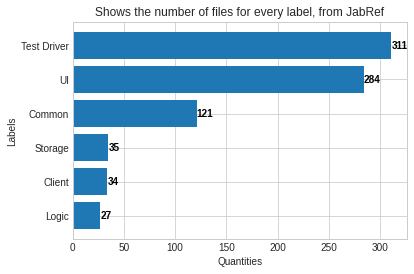

In [2]:
dataset_df = pd.read_csv(str(RP.getRawDataSet()))
y_labels = dataset_df.Label.unique()
x_quantity = [len(dataset_df.loc[dataset_df['Label']==label]) for label in y_labels]
tmp_df = pd.DataFrame({
    'Labels' : y_labels,
    'Quantity' : x_quantity
})
tmp_df = tmp_df.sort_values(by=['Quantity'])
plt.style.use("seaborn-whitegrid")
plt.barh(y=tmp_df.Labels, width=tmp_df.Quantity)
for i, v in enumerate(tmp_df.Quantity):
    plt.text(v, i, str(v), color='black', fontweight='bold', ha='left', va='center')

plt.xlabel('Quantities')
plt.ylabel('Labels')
plt.title('Shows the number of files for every label, from JabRef')

# Evaluation
The figure above shows the spread of the given concerns and imbalance in the dataset taken from the JabRef architecture.

### Static parts
__Train-test split,__ will be set at 10% for training, and 90% for evaluation.  
* __Metrics,__ the most relevant ones will be the following:  
   * Confusion matrix  
   * Precission  
   * Accuracy  
   * F1-score/value  
   * Average score (laoa will explain)  
    
----

### Preprocessing settings
```
settings = [
        ['extraction', 'parsing' ... ,'parsing],
        ...,
        ['extraction', 'parsing']
    ]
```
#### Extraction options
* Raw data: 'raw'
* Classes: 'c'
* Public methods: 'pm'
* Public variables/objects: 'pv'
* Import: 'lib'
* Packages: 'pac'
* Comments: 'com'
* Clear commands: 'clear'

#### Parsing options
* Lower case: 'lc'
* Remove single characters:  'sc'
* Remove stop words: 'sw'
* Remove java keywords: 'jk'
* Remove java annotations: 'ja' NOT IMPLEMENTED
* Remove java syntax ('jk','ja','sc'): 'js' NOT IMPLEMENTED
* Remove english stopwords: 'es'
* Remove numbers: 'nu'
* Separate compound words: 'scw'
* Default, then exit preprocess: 'd'
* Clear commands: 'clear'

___

# Basic preprocessing
1. Word tokenize the whole file, removing special characters with the following regex '\\w+'.
2. Remove java keywords.
3. Separate composite words (e.g. 'getFieldNames' = 'get', 'Field', 'Names').
4. Lower case the tokens.


___

# Type 1 preprocessing
With the idea of separating the packages from import libraries so that they don't get grouped together, we do the following:
1. Extract packages, and parse:  
    1. Tokenize words, removing punctuations      
    2. Remove Java keywords  
2. Extract libraries:     
3. Extract public methods:  
    1. Tokenize, and separate compound words  
    2. Lower case  
    3. Remove English stopwords  

___

# Test different Combinations


### Preprocessing settings
```
settings = [
        ['extraction', 'parsing' ... ,'parsing],
        ...,
        ['extraction', 'parsing']
    ]
```
#### Extraction options
* Raw data: 'raw'
* Classes: 'c'
* Public methods: 'pm'
* Public variables/objects: 'pv'
* Import: 'lib'
* Packages: 'pac'
* Comments: 'com'
* Clear commands: 'clear'

#### Parsing options
* Lower case: 'lc'
* Remove single characters:  'sc'
* Remove stop words: 'sw'
* Remove java keywords: 'jk'
* Remove java annotations: 'ja' NOT IMPLEMENTED
* Remove java syntax ('jk','ja','sc'): 'js' NOT IMPLEMENTED
* Remove english stopwords: 'es'
* Remove numbers: 'nu'
* Separate compound words: 'scw'
* Stem words: 'stem'
* Clear commands: 'clear'

___

# TEST

In [10]:
# maxent 
s1 = [
    ['lib', 'tow', 'jk', 'scw','lc', 'stem'],
    ['pac', 'tow', 'jk'],
    ]

s2 = [
    ['lib', 'tow', 'jk', 'scw','lc', 'stem'],
    ['pac',  'tow', 'jk'],
    ['com', 'tow', 'jk', 'scw', 'lc', 'sw'],
]

# Interestting results
s3 = [
    ['lib', 'tow', 'jk', 'scw','lc', 'sw', 'stem'],
    ['pac', 'tow', 'jk', 'scw','lc', 'sw', 'stem'],
    ['pm', 'tow', 'jk', 'scw','lc', 'sw', 'stem'],
    ['pv', 'tow', 'jk', 'scw','lc', 'sw', 'stem'],
    ['com', 'tow', 'jk', 'scw','lc', 'sw', 'stem'],
    ['c', 'tow', 'jk', 'scw','lc', 'sw', 'stem'],
]

s4 = [
    ['pac', 'tow', 'jk'],
    ['lib', 'tow', 'scw', 'jk', 'lc', 'stem'],
    ['pm', 'tow', 'scw', 'jk', 'lc', 'sw'],
]
s5 = [
    ['pac', 'tow', 'jk',],
    ['lib', 'tow', 'scw', 'jk', 'lc', 'stem'],
    ['c', 'tow', 'scw', 'jk', 'lc'],
    ['pm', 'tow', 'scw', 'jk', 'lc', 'sw', 'stem'],
    ['pv', 'tow', 'jk', 'scw','lc', 'sw', 'stem'],
]
s6 = [
    ['lib', 'tow', 'jk', 'scw','lc', 'sw', 'stem'],
    ['pac', 'tow', 'jk'],
    ['pm', 'tow', 'jk', 'scw','lc', 'sw'],
    ['pv', 'tow', 'jk', 'scw','lc', 'sw', 'stem'],
    ['com', 'tow', 'jk', 'scw','lc', 'sw', 'stem'],
    ['c', 'tow', 'jk', 'scw','lc', 'sw', 'stem'],
]
s7 = [
    ['lib', 'tow', 'jk', 'scw','lc', 'sw', 'stem'],
    ['pac', 'tow', 'jk'],
    ['pm', 'tow', 'jk', 'scw','lc', 'sw'],
    ['pv', 'tow', 'jk', 'scw','lc', 'sw'],
    ['com', 'tow', 'jk', 'scw','lc', 'sw', 'stem'],
    ['c', 'tow', 'jk', 'scw','lc', 'sw'],
]
s8 = [
    ['lib', 'tow', 'jk', 'scw','lc', 'sw', 'stem'],
    ['pac', 'tow', 'jk'],
    ['pm', 'tow', 'jk', 'scw','lc'],
    ['pv', 'tow', 'jk', 'lc'],
    ['com', 'tow', 'jk', 'scw','lc', 'sw', 'stem'],
    ['c', 'tow', 'jk'],
]
type_1 = [
    ['lib'],
    ['pm', 'scw', 'lc', 'sw'],
    ['pac', 'tow', 'jk'],
]
typ2 = [
    ['lib', 'tow', 'jk', 'scw','lc', 'stem'],
    ['pac', 'tow', 'jk'],
    ['pm','tow','jk', 'scw', 'lc', 'sw'],
]
basic = [["raw", "tow", "jk", "scw", "lc"]]
test_file = '../Data/test.csv'
Prep.preprocess_settings(s1, test_file)

,FileName,Label,FileContent
0,RemoteApiClient.java,Client,"[io, ioexcept, com, googl, appengin, tool, rem..."
1,package-info.java,Client,"[teammates, client, remoteapi]"
2,LoopHelper.java,Client,"[teammates, client, scripts, util]"
3,Stopwatch.java,Client,"[teammates, client, scripts, util]"
4,package-info.java,Client,"[teammates, client, scripts, util]"
...,...,...,...
807,FeedbackResultsResponseTable.java,UI,"[util, list, teammates, ui, template]"
808,StudentProfile.java,UI,"[teammat, common, datatransf, attribut, studen..."
809,StudentProfileEditBox.java,UI,"[util, list, teammat, common, datatransf, attr..."
810,package-info.java,UI,"[teammates, ui, template]"


In [11]:
test_df = pd.read_csv(test_file)
# Remove GLOBALS and CLI from the dataset
df_sliced = Utils.remove_concerns_under_quantity_threshold(test_df)
test_size=0.9
fold_quantity = 10
feature_representation = CountVectorizer()
confusion_list = []

# Train and gather evaluation metrics
evaluate = Eva.Evaluation(df_sliced, feature_representation, test_size, fold_quantity, 10)
classifier_max_ent , metrics_max_ent = evaluate.evaluate_MaxEnt()
classifier_svm , metrics_svm = evaluate.evaluate_SVM()
classifier_naive, metrics_naive = evaluate.evaluate_Naive_Bayes()

metrics = {
    'maxEnt': metrics_max_ent,
    'SVM': metrics_svm,
    'Naive': metrics_naive
}

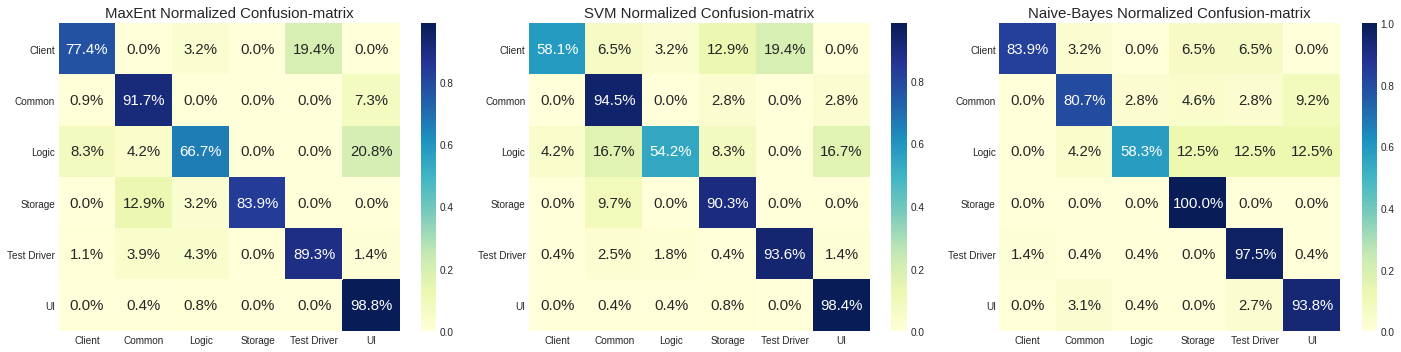

In [12]:
#fig, axis = plt.subplots(1,3, figsize=(20, 5))
#axis[0].set_title(metrics_max_ent.name + " Normalized Confusion-matrix",fontsize = 15)
#axis[1].set_title(metrics_svm.name + " Normalized Confusion-matrix",fontsize = 15)
#axis[2].set_title(metrics_naive.name + " Normalized Confusion-matrix",fontsize = 15)
#fig1 = Graphs.visualize_normalized_confusion_matrix(metrics_max_ent, axis[0])
#fig2 = Graphs.visualize_normalized_confusion_matrix(metrics_svm, axis[1])
#fig3 = Graphs.visualize_normalized_confusion_matrix(metrics_naive, axis[2])
#plt.tight_layout()
#plt.show()
Graphs.plot_horizontal_graphs(metrics, 'norm')

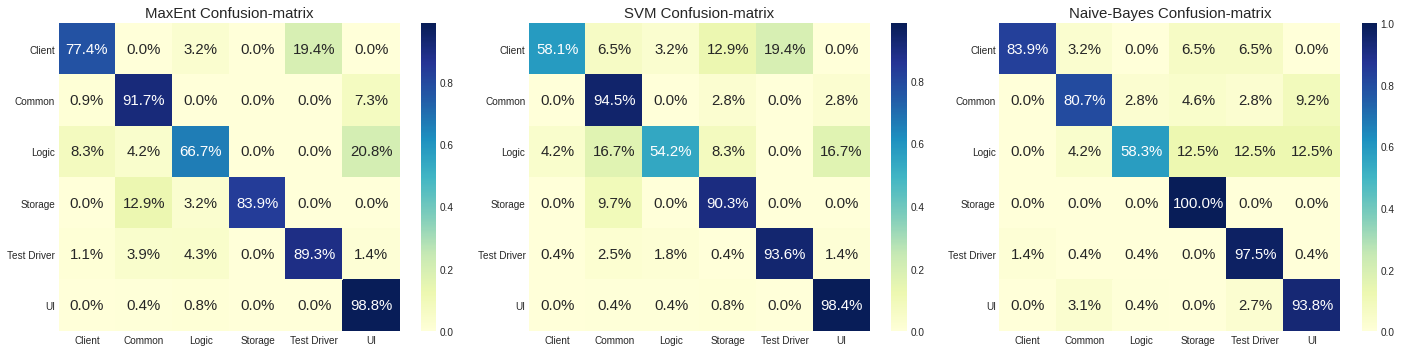

In [13]:
#fig, axis = plt.subplots(1,3, figsize=(20, 5))
#axis[0].set_title(metrics_max_ent.name + " Confusion-matrix",fontsize = 15)
#axis[1].set_title(metrics_svm.name + " Confusion-matrix",fontsize = 15)
#axis[2].set_title(metrics_naive.name + " Confusion-matrix",fontsize = 15)
#fig1 = metrics_max_ent.visualize_confusion_matrix(axis[0])
#fig2 = metrics_svm.visualize_confusion_matrix(axis[1])
#fig3 = metrics_naive.visualize_confusion_matrix(axis[2])
#plt.tight_layout()
#plt.show()
Graphs.plot_horizontal_graphs(metrics, 'regular')

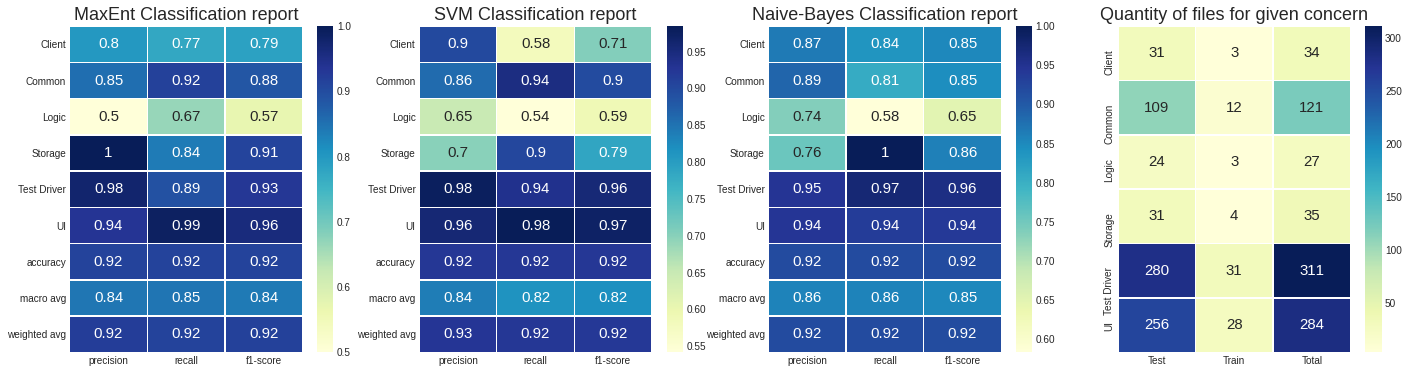

<Figure size 432x288 with 0 Axes>

In [14]:
#fig, axis = plt.subplots(1,4, figsize=(24, 6))
#axis[0].set_title(metrics_max_ent.name + " Classification report",fontsize = 18)
#axis[1].set_title(metrics_svm.name + " Classification report",fontsize = 18)
#axis[2].set_title(metrics_naive.name + " Classification report",fontsize = 18)
#axis[3].set_title("Quantity of files for given concern", fontsize=18)
#fig1 = metrics_max_ent.plot_data_info(axis[0])
#fig2 = metrics_svm.plot_data_info(axis[1])
#fig3 = metrics_naive.plot_data_info(axis[2])
#metrics_naive.plot_support_table(axis[3])
#plt.tight_layout()
#plt.show()
Graphs.plot_horizontal_graphs(metrics, 'report')

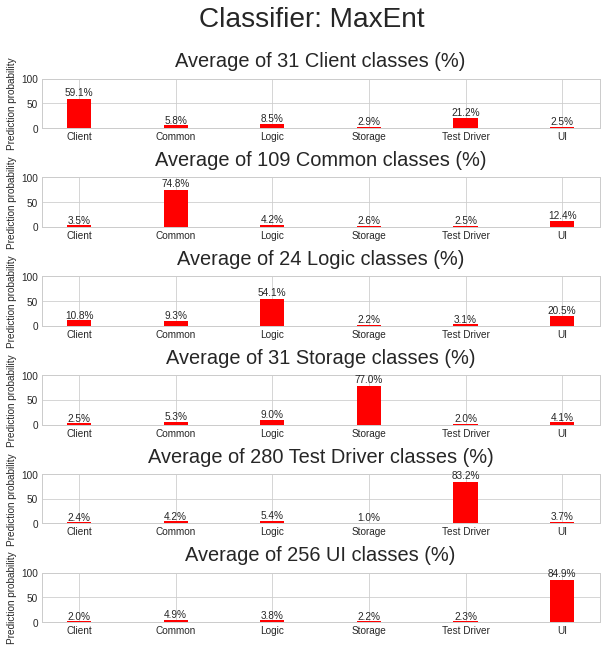

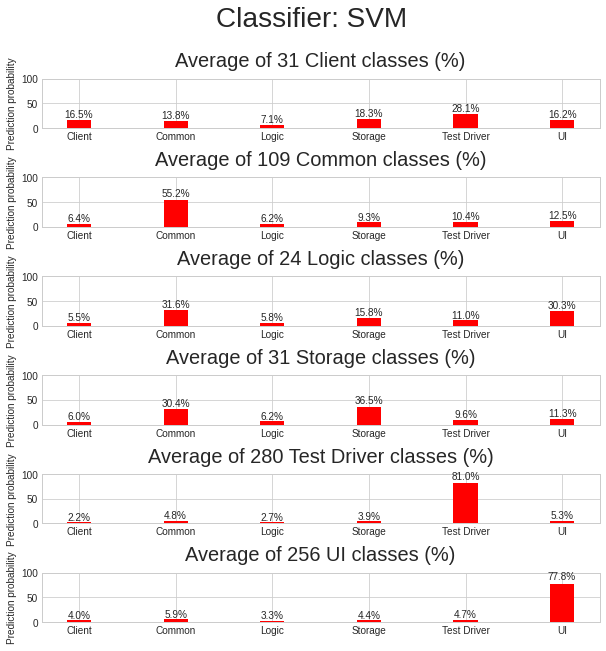

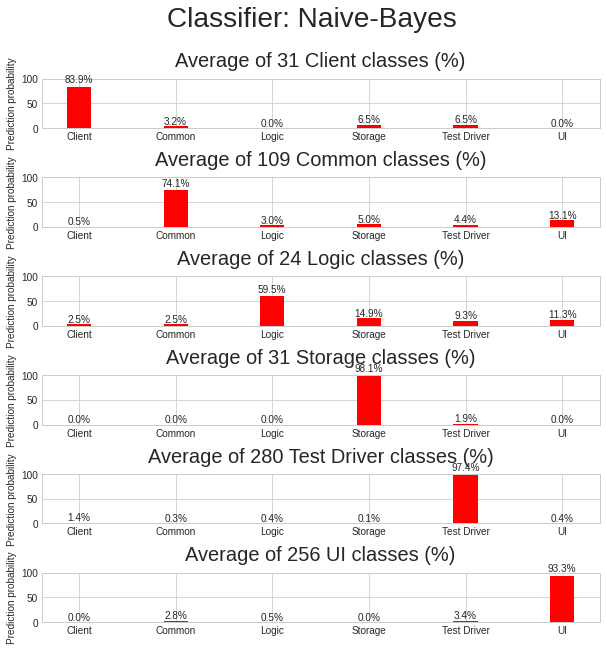

In [15]:
Graphs.plot_predictionScoreAverage(metrics_max_ent, classifier_max_ent)
Graphs.plot_predictionScoreAverage(metrics_svm, classifier_svm)
Graphs.plot_predictionScoreAverage(metrics_naive, classifier_naive)

In [16]:
df = metrics_svm.total_report_table()
df

,Client,Common,Logic,Storage,Test Driver,UI,accuracy,macro avg,weighted avg
precision,0.900000,0.858333,0.650000,0.700000,0.977612,0.958175,0.924761,0.840687,0.927199
recall,0.580645,0.944954,0.541667,0.903226,0.935714,0.984375,0.924761,0.815097,0.924761
f1-score,0.705882,0.899563,0.590909,0.788732,0.956204,0.971098,0.924761,0.818732,0.923264
support,31.000000,109.000000,24.000000,31.000000,280.000000,256.000000,0.924761,731.000000,731.000000
Test,31.000000,109.000000,24.000000,31.000000,280.000000,256.000000,NaN,NaN,NaN
Train,3.000000,12.000000,3.000000,4.000000,31.000000,28.000000,NaN,NaN,NaN
Total,34.000000,121.000000,27.000000,35.000000,311.000000,284.000000,NaN,NaN,NaN
